## Sequence filters

In [1]:
# Import auxiliary libraries for demonstration

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams[ "figure.figsize" ] = [ 5, 4 ]
plt.style.use( "default" )

plt.rcParams[ "figure.dpi" ] = 80
plt.rcParams[ "font.family" ] = "Times New Roman"
plt.rcParams[ "font.size" ] = '14'

### Sequence peakValley filter

Function `sequencePeakValleyFilter` returns the peaks and valleys of a sequence.

#### Function help

In [2]:
from ffpack.utils import sequencePeakValleyFilter
help( sequencePeakValleyFilter )

Help on function sequencePeakValleyFilter in module ffpack.utils.generalUtils:

sequencePeakValleyFilter(data, keepEnds=False)
    Remove the intermediate value and only get the peaks and valleys of the data
    
    The peak and valley refer the data points that are EXACTLY above and below
    the neighbors, not equal. 
    
    Parameters
    ----------
    data: 1darray
        Sequence data to get peaks and valleys.
    keepEnds: bool, optional
        If two ends of the original data should be preserved.
    
    Returns
    -------
    rst: 1darray
        A list contains the peaks and valleys of the data.
    
    Raises
    ------
    ValueError
        If the data dimension is not 1.
        If the data length is less than 2 with keedEnds == False.
        If the data length is less than 3 with keedEnds == True.
    
    Examples
    --------
    >>> from ffpack.utils import sequencePeakValleyFilter
    >>> data = [ -0.5, 1.0, -2.0, 3.0, -1.0, 4.5, -2.5, 3.5, -1.5, 1.0 ]
    >

#### Example with default values

In [3]:
gspvSequenceData = [ -0.5, 0.0, 1.0, -1.0, -2.0, -1.0, 1.5, 3.0, 2.5, -1.0, 0.5, 1.5, 4.5, 
                     3.5, 1.0, -1.0, -2.5, -1.5, 3.0, 3.5, 1.5, 0.0, -1.5, 0.5, 1.0 ]

gspvResults = sequencePeakValleyFilter( gspvSequenceData, keepEnds=False )

In [4]:
print( gspvResults )

[1.0, -2.0, 3.0, -1.0, 4.5, -2.5, 3.5, -1.5]


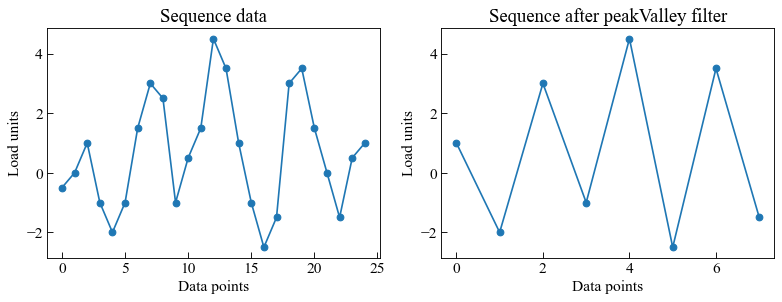

In [5]:
fig, ( ax1, ax2 ) = plt.subplots( 1, 2, figsize=( 10, 4 ) )

ax1.plot( gspvSequenceData, 'o-' )

ax1.tick_params( axis='x', direction="in", length=5 )
ax1.tick_params( axis='y', direction="in", length=5 )
ax1.set_ylabel( "Load units" )
ax1.set_xlabel( "Data points" )
ax1.set_title( "Sequence data" )

ax2.plot( gspvResults, 'o-' )

ax2.tick_params(axis='x', direction="in", length=5)
ax2.tick_params(axis='y', direction="in", length=5)
ax2.set_ylabel( "Load units" )
ax2.set_xlabel( "Data points" )
ax2.set_title( "Sequence after peakValley filter" )

plt.tight_layout()
plt.show()

#### Example with keep end points

In [6]:
from ffpack.utils import sequencePeakValleyFilter

In [7]:
gspvSequenceData = [ -0.5, 0.0, 1.0, -1.0, -2.0, -1.0, 1.5, 3.0, 2.5, -1.0, 0.5, 1.5, 4.5, 
                     3.5, 1.0, -1.0, -2.5, -1.5, 3.0, 3.5, 1.5, 0.0, -1.5, 0.5, 1.0 ]

gspvResults = sequencePeakValleyFilter( gspvSequenceData, keepEnds=True )

In [8]:
print( gspvResults )

[-0.5, 1.0, -2.0, 3.0, -1.0, 4.5, -2.5, 3.5, -1.5, 1.0]


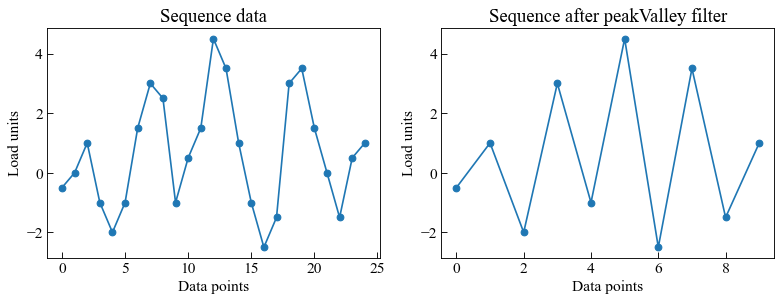

In [9]:
fig, ( ax1, ax2 ) = plt.subplots( 1, 2, figsize=( 10, 4 ) )

ax1.plot( gspvSequenceData, 'o-' )

ax1.tick_params( axis='x', direction="in", length=5 )
ax1.tick_params( axis='y', direction="in", length=5 )
ax1.set_ylabel( "Load units" )
ax1.set_xlabel( "Data points" )
ax1.set_title( "Sequence data" )

ax2.plot( gspvResults, 'o-' )

ax2.tick_params(axis='x', direction="in", length=5)
ax2.tick_params(axis='y', direction="in", length=5)
ax2.set_ylabel( "Load units" )
ax2.set_xlabel( "Data points" )
ax2.set_title( "Sequence after peakValley filter" )

plt.tight_layout()
plt.show()

### Sequence hysteresis filter

Function `sequenceHysteresisFilter` returns the sequence after hysteresis filtering.

#### Function help

In [10]:
from ffpack.utils import sequenceHysteresisFilter
help( sequenceHysteresisFilter )

Help on function sequenceHysteresisFilter in module ffpack.utils.generalUtils:

sequenceHysteresisFilter(data, gateSize)
    Filter data within the gateSize.
    
    Any cycle that has an amplitude smaller than the gate is removed from the data. 
    This is done by scan the data, i.e., point i, to check if the next points, 
    i.e., i + 1, i + 2, ... are within the gate from point i. 
    
    Parameters
    ----------
    data: 1darray
        Sequence data to get peaks and valleys.
    gateSize: scalar
        Gate size to filter the data. 
    
    Returns
    -------
    rst: 1darray
        A list contains the filtered data.
    
    Raises
    ------
    ValueError
        If the data dimension is not 1.
        If the data length is less than 2.
        If gateSize is not a scalar or not positive. 
    
    Examples
    --------
    >>> from ffpack.utils import sequenceHysteresisFilter
    >>> data = [ 2, 5, 3, 6, 2, 4, 1, 6, 1, 3, 1, 5, 3, 6, 3, 6, 4, 5, 2 ]
    >>> gateSize

#### Example with default values

In [11]:
hfSequenceData = [ 2, 5, 3, 6, 2, 4, 1, 6, 1, 3, 1, 5, 3, 6, 3, 6, 4, 5, 4 ]

In [12]:
gateSize = 3
hfResults = sequenceHysteresisFilter( hfSequenceData, gateSize )

In [13]:
print( hfResults )

[2.0, 5.0, 6.0, 2.0, 1.0, 6.0, 1.0, 5.0, 6.0, 3.0, 6.0, 4.0]


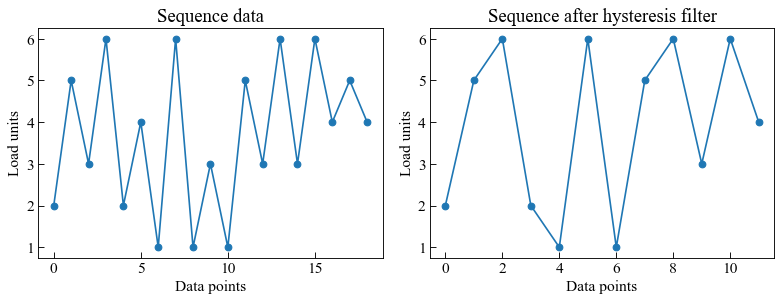

In [14]:
fig, ( ax1, ax2 ) = plt.subplots( 1, 2, figsize=( 10, 4 ) )

ax1.plot( hfSequenceData, 'o-' )

ax1.tick_params( axis='x', direction="in", length=5 )
ax1.tick_params( axis='y', direction="in", length=5 )
ax1.set_ylabel( "Load units" )
ax1.set_xlabel( "Data points" )
ax1.set_title( "Sequence data" )

ax2.plot( hfResults, 'o-' )

ax2.tick_params(axis='x', direction="in", length=5)
ax2.tick_params(axis='y', direction="in", length=5)
ax2.set_ylabel( "Load units" )
ax2.set_xlabel( "Data points" )
ax2.set_title( "Sequence after hysteresis filter" )

plt.tight_layout()
plt.show()

In [15]:
hfSequenceData = [ -0.5, 0.5, 0.2, 0.8, 1.0, -1.0, -2.0, -1.0, 0.8, 0.0, 1.5, 3.0, 2.5, 
                   2.0, 2.5, 1.5, -1.0, 0.5, 1.2, 0.8, 1.5, 2.5, 2.0, 3.5, 3.0, 4.5, 3.5,
                   4.0, 4.2, 3.3, 2.8, 3.0, 2.5, 3.0, 2.0, 1.0, 0.0, 0.5, -1.0, -2.0, 
                   -1.5, -2.0, -2.5, -1.5, -2.0, 0.0, 1.0, 1.2, 0.5, 2.0, 3.0, 4.0, 3.5, 
                   4.5, 3.5, 2.5, 3.5, 2.5, 3.0, 2.0, 2.5, 1.5, 0.5, 1.0, 0.5, 0.0, -1.0, 
                   -0.5 -1.5, -0.5, -1.0, 0.0, -0.5, 1.0 ]

In [16]:
gateSize = 1.5
hfResults = sequenceHysteresisFilter( hfSequenceData, gateSize )

In [17]:
print( hfResults )

[-0.5, 1.0, -1.0, 0.8, 1.5, 3.0, 1.5, -1.0, 0.5, 2.5, 3.5, 4.5, 2.8, 2.5, 2.0, 0.0, -1.0, -2.5, 0.0, 2.0, 4.0, 4.5, 2.5, 2.0, 1.5, 0.0, -2.0, -0.5, 0.0, 1.0]


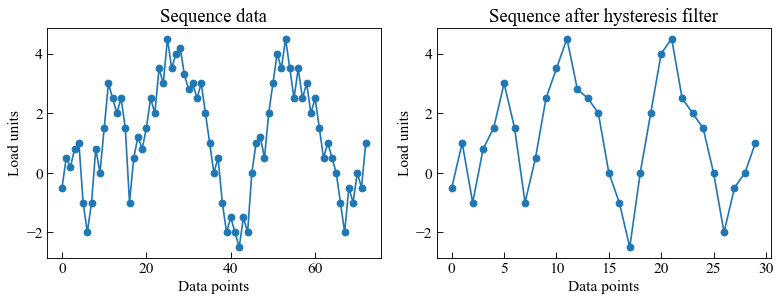

In [18]:
fig, ( ax1, ax2 ) = plt.subplots( 1, 2, figsize=( 10, 4 ) )

ax1.plot( hfSequenceData, 'o-' )

ax1.tick_params( axis='x', direction="in", length=5 )
ax1.tick_params( axis='y', direction="in", length=5 )
ax1.set_ylabel( "Load units" )
ax1.set_xlabel( "Data points" )
ax1.set_title( "Sequence data" )

ax2.plot( hfResults, 'o-' )

ax2.tick_params(axis='x', direction="in", length=5)
ax2.tick_params(axis='y', direction="in", length=5)
ax2.set_ylabel( "Load units" )
ax2.set_xlabel( "Data points" )
ax2.set_title( "Sequence after hysteresis filter" )

plt.tight_layout()
plt.show()